Homework #3 CPE 595-WN Chanmaly Matchittom 10/24/2024

Training a dataset using decision tree and random forest

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt


# Read in dataset
df = pd.read_csv('FloridaUpdated.csv')

# Observe head
print(df.head())

   brokered_by    status     price  bed  bath  acre_lot     street  \
0      34004.0  for_sale  275000.0    6     4       NaN   875159.0   
1      10386.0  for_sale  285000.0    3     2      0.26  1733659.0   
2      17067.0  for_sale  644000.0    4     4       NaN  1812861.0   
3      15801.0  for_sale  340000.0    3     2      0.17  1816455.0   
4      51500.0  for_sale  649000.0    3     1      0.59   297525.0   

               city    state  zip_code  house_size prev_sold_date  
0          Hilliard  Florida   32046.0        2368        6/19/89  
1             Yulee  Florida   32097.0        1635        1/24/14  
2  Fernandina Beach  Florida   32034.0        2814            NaN  
3             Yulee  Florida   32097.0        1503        12/5/17  
4  Fernandina Beach  Florida   32034.0        1896            NaN  


In [4]:
# Fill missing values & data handling
df['age'] = df['age'].fillna(df['age'].mean())
df['fare'] = df['fare'].fillna(df['fare'].mean())
df['body'] = df['body'].fillna(df['body'].mean())

# Encode pclass and sex
pclass_encoder = LabelEncoder()
sex_encoder = LabelEncoder()

df['pclass'] = LabelEncoder().fit_transform(df['pclass'])
df['sex'] = LabelEncoder().fit_transform(df['sex'])

pclass_mapping = {0: '3rd', 1: '1st', 2: '2nd'}
sex_mapping = {0: 'male', 1: 'female'}

In [5]:
# Take a random 80% for training and 20% for test
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Define variables
X_train = train_df[['pclass', 'sex', 'age', 'sibsp']]
y_train = train_df['survived']
X_test = test_df[['pclass', 'sex', 'age', 'sibsp']]
y_test = test_df['survived']

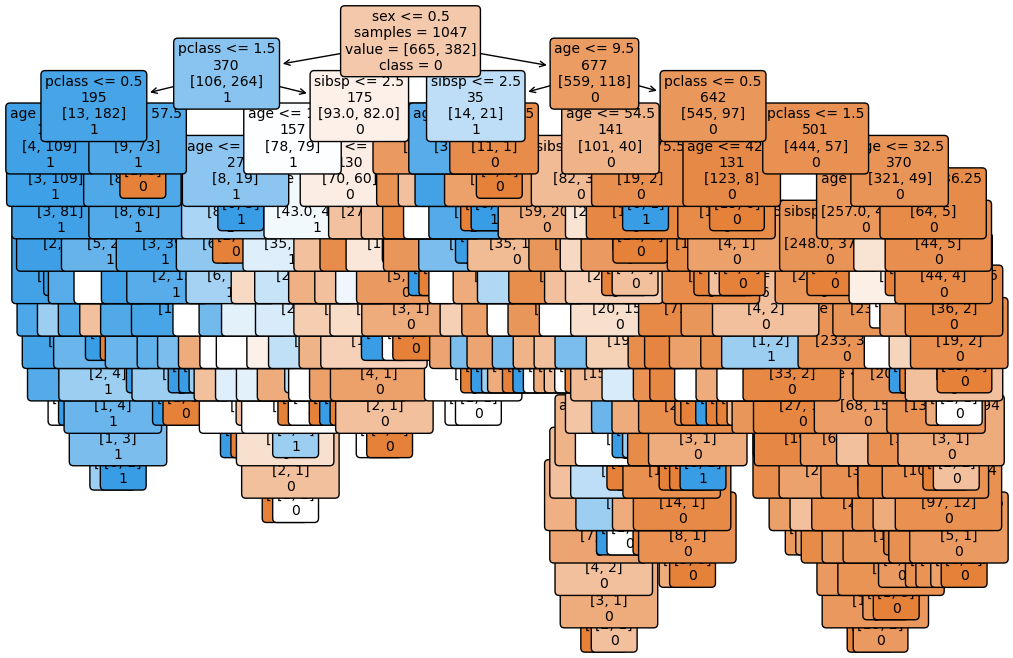

In [6]:
# Fit decision tree model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Plot the full tree
plt.figure(figsize=(12, 8))
tree.plot_tree(dt, filled=True, feature_names=['pclass', 'sex', 'age', 'sibsp'], class_names=['0', '1'], label='root', rounded=True, precision=2, impurity=False, proportion=False, fontsize=10)
plt.show()

In [7]:
# Define the parameter grid for max_leaf_nodes
param_grid = {'max_leaf_nodes': range(2, 50)}

# Use GridSearchCV to find the best max_leaf_nodes
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get best max_leaf_nodes value
best_max_leaf_nodes = grid_search.best_params_['max_leaf_nodes']
print(f"Best max_leaf_nodes: {best_max_leaf_nodes}")

Best max_leaf_nodes: 32


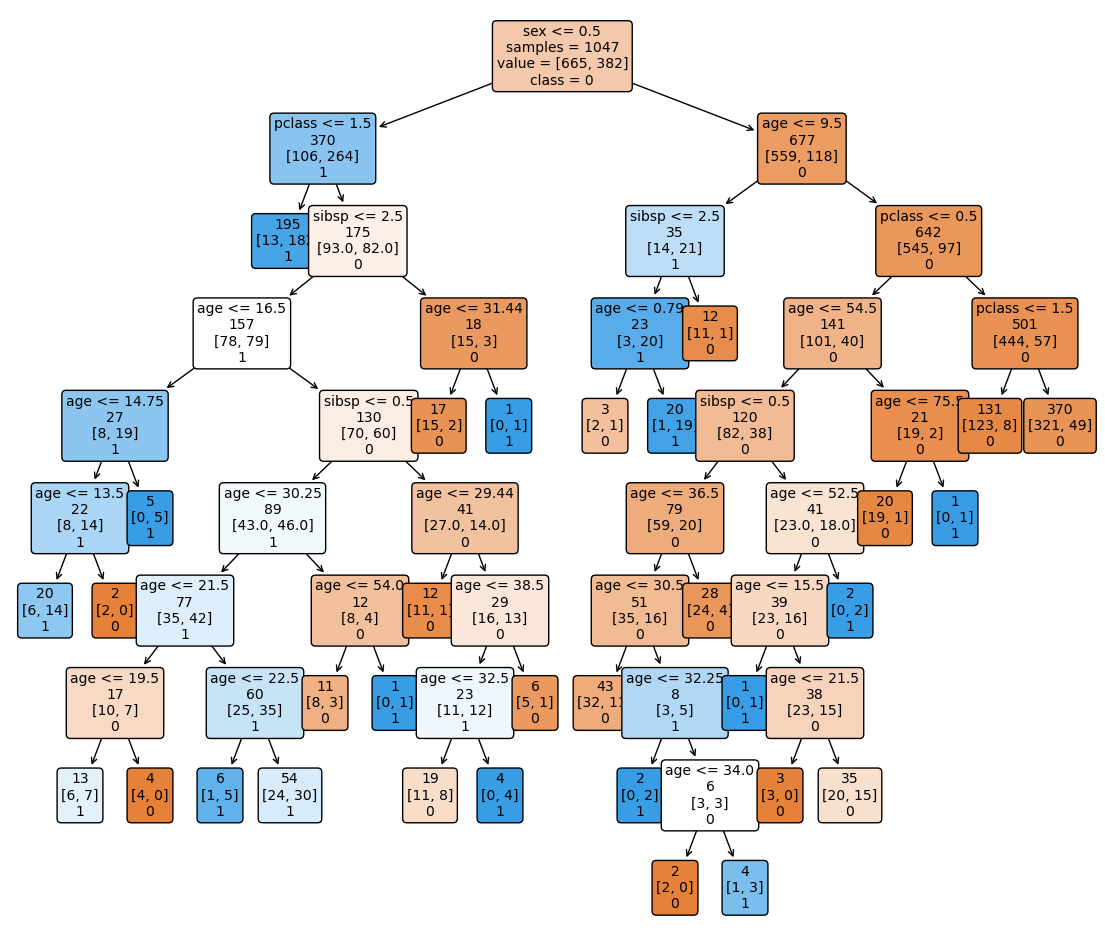

In [8]:
# Prune the tree 
dt_pruned = DecisionTreeClassifier(max_leaf_nodes=best_max_leaf_nodes, random_state=42)
dt_pruned.fit(X_train, y_train)

#Plot pruned tree
plt.figure(figsize=(14, 12))
tree.plot_tree(dt_pruned, filled=True, feature_names=['pclass', 'sex', 'age', 'sibsp'], class_names=['0', '1'], label='root', rounded=True, precision=2, impurity=False, proportion=False, fontsize=10)
plt.show()

In [9]:
# Report accuracy on test set

# Predict on the test set
y_pred_pruned = dt_pruned.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_pruned)
tn, fp, fn, tp = cm.ravel()

In [10]:
# Percent survivors correctly predicted
survivors_correct = tp / (tp + fn) * 100
print(f"Percent survivors correctly predicted: {survivors_correct:.2f}%")

Percent survivors correctly predicted: 60.17%


In [11]:
# Percent fatalities correctly predicted: 
fatalities_correct = tn / (tn + fp) * 100
print(f"Percent fatalities correctly predicted: {fatalities_correct:.2f}%")

Percent fatalities correctly predicted: 88.89%


In [12]:
# Train a random forest
rf = RandomForestClassifier(n_estimators=50, max_leaf_nodes=best_max_leaf_nodes, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(max_leaf_nodes=32, n_estimators=50, random_state=42)

In [13]:
# Predict on the test set
y_pred_rf = rf.predict(X_test)

# Compute confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
tn_rf, fp_rf, fn_rf, tp_rf = cm_rf.ravel()

In [14]:
# Percent survivors correctly predicted
survivors_correct_rf = tp_rf / (tp_rf + fn_rf) * 100
print(f"Percent survivors correctly predicted for Random Forest: {survivors_correct_rf:.2f}%")

Percent survivors correctly predicted for Random Forest: 57.63%


In [15]:
# Percent fatalities correctly predicted: 
fatalities_correct_rf = tn_rf / (tn_rf + fp_rf) * 100
print(f"Percent fatalities correctly predicted for Random Forest: {fatalities_correct_rf:.2f}%")

Percent fatalities correctly predicted for Random Forest: 90.28%


In [16]:
# Compare perfomance with pruned decision tree
if survivors_correct_rf > survivors_correct:
    print("Random Forest improves survivor predition.")
else:
    print("Random Forest does not improve survivor prediction.")

Random Forest does not improve survivor prediction.
